# https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from networkx.drawing.nx_pydot import write_dot
from networkx.linalg.graphmatrix import *
from networkx.algorithms.approximation import *
#from networkx.centrality import closn
from networkx.algorithms import *
import gc
gc.collect()


21

In [2]:
#input = pd.read_csv("/home/abhishek/Graph/titanic.csv")
#input = pd.read_csv("/home/abhishek/Graph/iris.csv")
input = pd.read_excel("Immunotherapy.xlsx")

In [3]:
input.head(5)

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


In [4]:
input.describe()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.544444,31.044444,7.230556,6.144444,1.711111,95.700000,14.333333,0.788889
std,0.500811,12.235435,3.098166,4.212238,0.824409,136.614643,17.217707,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,1.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,9.937500,8.750000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [5]:
input['age'] = pd.qcut(input['age'], q=10, labels=(1,2,3,4,5,6,7,8,9,10))
input['Time'] = pd.qcut(input['Time'], q=5, labels=(1,2,3,4,5))
input['Area'] = pd.qcut(input['Area'], q=10, labels=(1,2,3,4,5,6,7,8,9,10))
input['sex_new'] = input['sex']
del(input["sex"])
input['sex'] = input['sex_new']
del(input["sex_new"])
input.to_csv('/home/abhishek/Graph/6_Immunotherapy.csv', sep=',', encoding='utf-8')
input.describe()

,Number_of_Warts,Type,induration_diameter,Result_of_Treatment,sex
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,6.144444,1.711111,14.333333,0.788889,1.544444
std,4.212238,0.824409,17.217707,0.410383,0.500811
min,1.000000,1.000000,2.000000,0.000000,1.000000
25%,2.000000,1.000000,5.000000,1.000000,1.000000
50%,6.000000,1.000000,7.000000,1.000000,2.000000
75%,8.750000,2.000000,9.000000,1.000000,2.000000
max,19.000000,3.000000,70.000000,1.000000,2.000000


In [6]:

del(input["Result_of_Treatment"])

In [7]:
total_rows=len(input.axes[0])
total_cols=len(input.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print("Max of connection in graph: "+str(total_rows*total_cols))


Number of Rows: 90
Number of Columns: 7
Max of connection in graph: 630


In [8]:
#

In [9]:
#input(input)
input.head(5) 

,age,Time,Number_of_Warts,Type,Area,induration_diameter,sex
0,3,1,14,3,5,50,1
1,1,1,2,3,10,70,1
2,2,4,2,1,9,25,1
3,5,2,9,3,8,30,1
4,3,3,6,1,4,8,1


In [10]:
#input = Survived_0
input.shape

(90, 7)

In [11]:
'''input['Age_prect_10'] = pd.qcut(input['Age'], q=4)
input['Age_prect_level'] = pd.qcut(input['Age'], q=4, labels=(1,2,3,4))

input['Fare_prect_10'] = pd.qcut(input['Fare'], q=4)
input['Fare_prect_level'] = pd.qcut(input['Fare'], q=4, labels=(1,2,3,4))

input.loc[input['Sex'] == 'male', 'sex'] = '1'
input.loc[input['Sex'] == 'female', 'sex'] = '0'
#input.head(5)'''

"input['Age_prect_10'] = pd.qcut(input['Age'], q=4)\ninput['Age_prect_level'] = pd.qcut(input['Age'], q=4, labels=(1,2,3,4))\n\ninput['Fare_prect_10'] = pd.qcut(input['Fare'], q=4)\ninput['Fare_prect_level'] = pd.qcut(input['Fare'], q=4, labels=(1,2,3,4))\n\ninput.loc[input['Sex'] == 'male', 'sex'] = '1'\ninput.loc[input['Sex'] == 'female', 'sex'] = '0'\n#input.head(5)"

In [12]:
#drop un-use column
'''del input['Fare']
del input['Age'] 
del input['Age_prect_10'] 
del input['Fare_prect_10'] 
del input['Sex']''' 
input.head(5)

,age,Time,Number_of_Warts,Type,Area,induration_diameter,sex
0,3,1,14,3,5,50,1
1,1,1,2,3,10,70,1
2,2,4,2,1,9,25,1
3,5,2,9,3,8,30,1
4,3,3,6,1,4,8,1


In [13]:
input.columns

Index(['age', 'Time', 'Number_of_Warts', 'Type', 'Area', 'induration_diameter',
       'sex'],
      dtype='object')

In [14]:
def create_graph_data(input):
    another_input_list = []
    count = 0
    for i in range(len(input.axes[1])-1): #range(len(input.axes[1])-1)
        if len(input.axes[1]) > i :
            current_col = input.axes[1][i]
            next_col = input.axes[1][i+1]

            for j in range(len(input.axes[0])):
                item = str(input.axes[1][i])+'_'+str(input[current_col][j]),str(input.axes[1][i+1])+'_'+str(input[next_col][j]),input[next_col][j]
                another_input_list.append(item)
                count = count + j
            #
            #print(next_col,len(input.axes[1]),i,j)
        else:
            print("end")

    #print('number of combination of edge (%d)' % (count))
    
    return another_input_list

In [15]:
def graph_create(another_input_list):
    
    MG_1 = nx.DiGraph()
    MG_1.add_weighted_edges_from(another_input_list)
    pos = nx.nx_agraph.graphviz_layout(MG_1)
    nx.draw(MG_1, pos=pos,with_labels=True,node_color='r', edge_color='b',
            fontsize=1,width = 0.4, alpha = 0.7, scale = 10)
    plt.axis("Off")
    plt.show()
    print(MG_1.nodes())
    print('Number of edges',MG_1.number_of_edges())
    print('Number of Nodes',MG_1.number_of_nodes())
    return MG_1

# this code will print nice graph

In [16]:
#### this code will print nice graph
#MG_1 = graph_create(another_input_list)
#nx.nx_agraph.view_pygraphviz(MG_1)

In [17]:
def column_arrange (col_name,edge_impotance_order):
    col_name = list(col_name)
    temp = list(edge_impotance_order)[0].rpartition('_')[0]
    print('High ranked column ---->',temp)
    #print('\nOld column name order\n',col_name)
    col_name.remove(temp)
    col_name.insert(0,temp)
    #print('\nNew column name order\n',col_name)
    
    return list(col_name),temp
    #edge_impotance_order.keys()
    #google_PGR_O = google_matrix(MG_1, alpha=0.9)
    #google_PGR_O

In [18]:
def variable_imp (another_input_list):
    
    ################
    # approach-1    
    ################
    print("\nDiGraph")
    MG_1 = graph_create(another_input_list)
    edge_impotance_weight = {}
    edge_impotance_order = {}
    W=MG_1.edges.data('weight', default=1)
    count = 1
    while (MG_1.number_of_nodes() > 0):
        '''
        pos = nx.nx_agraph.graphviz_layout(MG_1)
        nx.draw(MG_1, pos=pos,with_labels=True,node_color='r', edge_color='b',
            fontsize=1,width = 0.4, alpha = 0.7, scale = 10)
        plt.axis("Off")
        plt.show()
        '''
        PGR_O = nx.pagerank(MG_1, alpha=0.90,max_iter=100, weight=W) 
        # , nstart=W this could be the start value of each node
        #type(PGR_O)
        #print(max(PGR_O.keys()))
        #print(round(max(PGR_O.values()),5))  # maximum rank of the node

        for key, value in PGR_O.items():
            if round(value,5) == round(max(PGR_O.values()),5):
                #print('Edge name -> ',key, '->', round(value,5))
                edge_impotance_weight.update({key:round(value,5)})
                edge_impotance_order.update({key:count})
                MG_1.remove_node(key)
                count = count + 1
                #print('Number of edge',MG_1.number_of_edges(key))

    return edge_impotance_weight,edge_impotance_order

# Run one time with default order of column

In [19]:
# Run one time with default order of column
col_name = input.columns
input = input.reindex(columns=col_name)
input.head(5)
#another_input_list = create_graph_data(input)
#another_input_list[0:5]

,age,Time,Number_of_Warts,Type,Area,induration_diameter,sex
0,3,1,14,3,5,50,1
1,1,1,2,3,10,70,1
2,2,4,2,1,9,25,1
3,5,2,9,3,8,30,1
4,3,3,6,1,4,8,1


In [20]:
#another_input_list = create_graph_data(input)

# create graph and node important for data set
#edge_impotance_weight,edge_impotance_order = variable_imp(another_input_list)


DiGraph


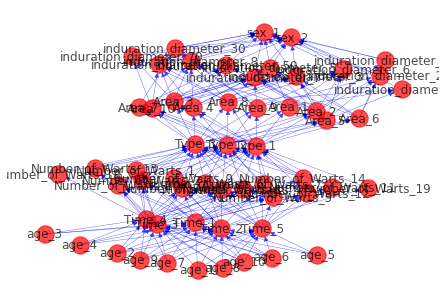

['age_3', 'Time_1', 'age_1', 'age_2', 'Time_4', 'age_5', 'Time_2', 'Time_3', 'age_7', 'age_6', 'Time_5', 'age_4', 'age_9', 'age_8', 'age_10', 'Number_of_Warts_14', 'Number_of_Warts_2', 'Number_of_Warts_9', 'Number_of_Warts_6', 'Number_of_Warts_3', 'Number_of_Warts_4', 'Number_of_Warts_12', 'Number_of_Warts_1', 'Number_of_Warts_7', 'Number_of_Warts_10', 'Number_of_Warts_19', 'Number_of_Warts_18', 'Number_of_Warts_11', 'Number_of_Warts_5', 'Number_of_Warts_13', 'Number_of_Warts_8', 'Type_3', 'Type_1', 'Type_2', 'Area_5', 'Area_10', 'Area_9', 'Area_8', 'Area_4', 'Area_1', 'Area_3', 'Area_2', 'Area_6', 'Area_7', 'induration_diameter_50', 'induration_diameter_70', 'induration_diameter_25', 'induration_diameter_30', 'induration_diameter_8', 'induration_diameter_7', 'induration_diameter_6', 'induration_diameter_2', 'induration_diameter_5', 'induration_diameter_3', 'induration_diameter_9', 'induration_diameter_45', 'sex_1', 'sex_2']
Number of edges 241
Number of Nodes 58
High ranked column ---

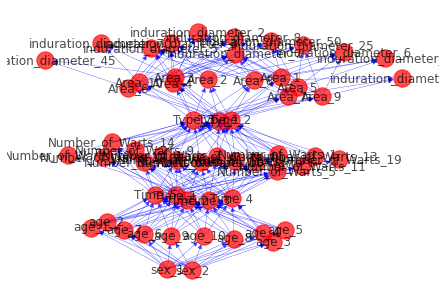

['sex_1', 'age_3', 'age_1', 'age_2', 'age_5', 'age_7', 'sex_2', 'age_6', 'age_4', 'age_9', 'age_8', 'age_10', 'Time_1', 'Time_4', 'Time_2', 'Time_3', 'Time_5', 'Number_of_Warts_14', 'Number_of_Warts_2', 'Number_of_Warts_9', 'Number_of_Warts_6', 'Number_of_Warts_3', 'Number_of_Warts_4', 'Number_of_Warts_12', 'Number_of_Warts_1', 'Number_of_Warts_7', 'Number_of_Warts_10', 'Number_of_Warts_19', 'Number_of_Warts_18', 'Number_of_Warts_11', 'Number_of_Warts_5', 'Number_of_Warts_13', 'Number_of_Warts_8', 'Type_3', 'Type_1', 'Type_2', 'Area_5', 'Area_10', 'Area_9', 'Area_8', 'Area_4', 'Area_1', 'Area_3', 'Area_2', 'Area_6', 'Area_7', 'induration_diameter_50', 'induration_diameter_70', 'induration_diameter_25', 'induration_diameter_30', 'induration_diameter_8', 'induration_diameter_7', 'induration_diameter_6', 'induration_diameter_2', 'induration_diameter_5', 'induration_diameter_3', 'induration_diameter_9', 'induration_diameter_45']
Number of edges 238
Number of Nodes 58
High ranked column ---

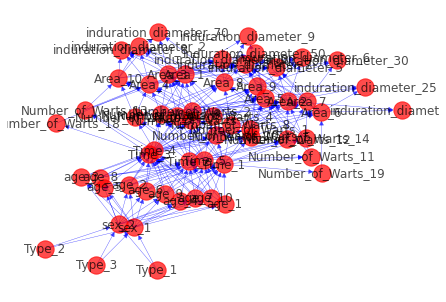

['Type_3', 'sex_1', 'Type_1', 'Type_2', 'sex_2', 'age_3', 'age_1', 'age_2', 'age_5', 'age_7', 'age_6', 'age_4', 'age_9', 'age_8', 'age_10', 'Time_1', 'Time_4', 'Time_2', 'Time_3', 'Time_5', 'Number_of_Warts_14', 'Number_of_Warts_2', 'Number_of_Warts_9', 'Number_of_Warts_6', 'Number_of_Warts_3', 'Number_of_Warts_4', 'Number_of_Warts_12', 'Number_of_Warts_1', 'Number_of_Warts_7', 'Number_of_Warts_10', 'Number_of_Warts_19', 'Number_of_Warts_18', 'Number_of_Warts_11', 'Number_of_Warts_5', 'Number_of_Warts_13', 'Number_of_Warts_8', 'Area_5', 'Area_10', 'Area_9', 'Area_8', 'Area_4', 'Area_1', 'Area_3', 'Area_2', 'Area_6', 'Area_7', 'induration_diameter_50', 'induration_diameter_70', 'induration_diameter_25', 'induration_diameter_30', 'induration_diameter_8', 'induration_diameter_7', 'induration_diameter_6', 'induration_diameter_2', 'induration_diameter_5', 'induration_diameter_3', 'induration_diameter_9', 'induration_diameter_45']
Number of edges 244
Number of Nodes 58
High ranked column ---

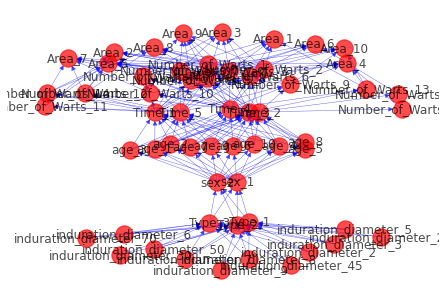

['induration_diameter_50', 'Type_3', 'induration_diameter_70', 'induration_diameter_25', 'Type_1', 'induration_diameter_30', 'induration_diameter_8', 'induration_diameter_7', 'induration_diameter_6', 'Type_2', 'induration_diameter_2', 'induration_diameter_5', 'induration_diameter_3', 'induration_diameter_9', 'induration_diameter_45', 'sex_1', 'sex_2', 'age_3', 'age_1', 'age_2', 'age_5', 'age_7', 'age_6', 'age_4', 'age_9', 'age_8', 'age_10', 'Time_1', 'Time_4', 'Time_2', 'Time_3', 'Time_5', 'Number_of_Warts_14', 'Number_of_Warts_2', 'Number_of_Warts_9', 'Number_of_Warts_6', 'Number_of_Warts_3', 'Number_of_Warts_4', 'Number_of_Warts_12', 'Number_of_Warts_1', 'Number_of_Warts_7', 'Number_of_Warts_10', 'Number_of_Warts_19', 'Number_of_Warts_18', 'Number_of_Warts_11', 'Number_of_Warts_5', 'Number_of_Warts_13', 'Number_of_Warts_8', 'Area_5', 'Area_10', 'Area_9', 'Area_8', 'Area_4', 'Area_1', 'Area_3', 'Area_2', 'Area_6', 'Area_7']
Number of edges 218
Number of Nodes 58
High ranked column ---

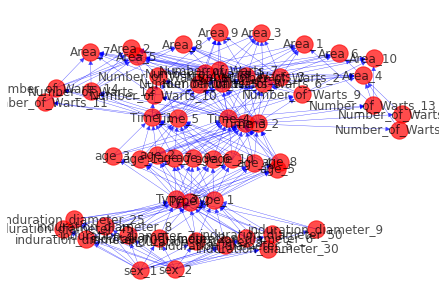

['sex_1', 'induration_diameter_50', 'induration_diameter_70', 'induration_diameter_25', 'induration_diameter_30', 'induration_diameter_8', 'induration_diameter_7', 'induration_diameter_6', 'sex_2', 'induration_diameter_2', 'induration_diameter_5', 'induration_diameter_3', 'induration_diameter_9', 'induration_diameter_45', 'Type_3', 'Type_1', 'Type_2', 'age_3', 'age_1', 'age_2', 'age_5', 'age_7', 'age_6', 'age_4', 'age_9', 'age_8', 'age_10', 'Time_1', 'Time_4', 'Time_2', 'Time_3', 'Time_5', 'Number_of_Warts_14', 'Number_of_Warts_2', 'Number_of_Warts_9', 'Number_of_Warts_6', 'Number_of_Warts_3', 'Number_of_Warts_4', 'Number_of_Warts_12', 'Number_of_Warts_1', 'Number_of_Warts_7', 'Number_of_Warts_10', 'Number_of_Warts_19', 'Number_of_Warts_18', 'Number_of_Warts_11', 'Number_of_Warts_5', 'Number_of_Warts_13', 'Number_of_Warts_8', 'Area_5', 'Area_10', 'Area_9', 'Area_8', 'Area_4', 'Area_1', 'Area_3', 'Area_2', 'Area_6', 'Area_7']
Number of edges 244
Number of Nodes 58
High ranked column ---

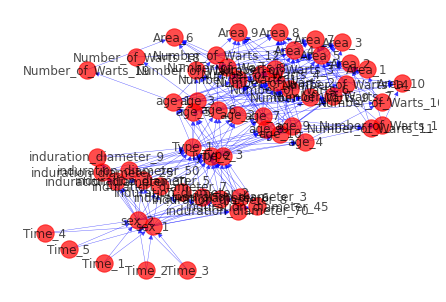

['Time_1', 'sex_1', 'Time_4', 'Time_2', 'Time_3', 'sex_2', 'Time_5', 'induration_diameter_50', 'induration_diameter_70', 'induration_diameter_25', 'induration_diameter_30', 'induration_diameter_8', 'induration_diameter_7', 'induration_diameter_6', 'induration_diameter_2', 'induration_diameter_5', 'induration_diameter_3', 'induration_diameter_9', 'induration_diameter_45', 'Type_3', 'Type_1', 'Type_2', 'age_3', 'age_1', 'age_2', 'age_5', 'age_7', 'age_6', 'age_4', 'age_9', 'age_8', 'age_10', 'Number_of_Warts_14', 'Number_of_Warts_2', 'Number_of_Warts_9', 'Number_of_Warts_6', 'Number_of_Warts_3', 'Number_of_Warts_4', 'Number_of_Warts_12', 'Number_of_Warts_1', 'Number_of_Warts_7', 'Number_of_Warts_10', 'Number_of_Warts_19', 'Number_of_Warts_18', 'Number_of_Warts_11', 'Number_of_Warts_5', 'Number_of_Warts_13', 'Number_of_Warts_8', 'Area_5', 'Area_10', 'Area_9', 'Area_8', 'Area_4', 'Area_1', 'Area_3', 'Area_2', 'Area_6', 'Area_7']
Number of edges 225
Number of Nodes 58
High ranked column ---

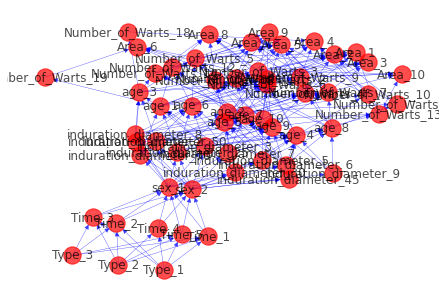

['Type_3', 'Time_1', 'Type_1', 'Time_4', 'Time_2', 'Time_3', 'Type_2', 'Time_5', 'sex_1', 'sex_2', 'induration_diameter_50', 'induration_diameter_70', 'induration_diameter_25', 'induration_diameter_30', 'induration_diameter_8', 'induration_diameter_7', 'induration_diameter_6', 'induration_diameter_2', 'induration_diameter_5', 'induration_diameter_3', 'induration_diameter_9', 'induration_diameter_45', 'age_3', 'age_1', 'age_2', 'age_5', 'age_7', 'age_6', 'age_4', 'age_9', 'age_8', 'age_10', 'Number_of_Warts_14', 'Number_of_Warts_2', 'Number_of_Warts_9', 'Number_of_Warts_6', 'Number_of_Warts_3', 'Number_of_Warts_4', 'Number_of_Warts_12', 'Number_of_Warts_1', 'Number_of_Warts_7', 'Number_of_Warts_10', 'Number_of_Warts_19', 'Number_of_Warts_18', 'Number_of_Warts_11', 'Number_of_Warts_5', 'Number_of_Warts_13', 'Number_of_Warts_8', 'Area_5', 'Area_10', 'Area_9', 'Area_8', 'Area_4', 'Area_1', 'Area_3', 'Area_2', 'Area_6', 'Area_7']
Number of edges 238
Number of Nodes 58
High ranked column ---

In [21]:
col_count = 0
imp_attribute = []
edge_impotance_order_final = {}
while (col_count < len(input.columns)):
    # create graph dataset
    another_input_list = create_graph_data(input)

    # create graph and node important for data set
    edge_impotance_weight,edge_impotance_order = variable_imp(another_input_list)

    # make important node as primary node
    col_name,imp = column_arrange(col_name,edge_impotance_order)
    
    imp_attribute.append(imp)
    
    edge_impotance_order_final.update({col_count:edge_impotance_weight})

    #arrange the data set as per new order
    input = input.reindex(columns=col_name)
    #input.head(5)
    col_count = col_count + 1
    #print(col_count)

In [22]:
imp_attribute

['sex', 'Type', 'induration_diameter', 'sex', 'Time', 'Type', 'Area']

In [23]:
#

In [24]:
test = pd.DataFrame(edge_impotance_order_final)
type(test)
#test["attribute_name"] = test.index

pandas.core.frame.DataFrame

In [25]:
#

In [26]:
# convert the index into column
#test.reset_index(level=0, inplace=True)
#test["attribute_name"] = test.index
emp = list(edge_impotance_order)[0].rpartition('_')[0]
test

,0,1,2,3,4,5,6
sex_2,0.10855,0.03571,0.06196,0.04163,0.03571,0.05051,0.04099
sex_1,0.19275,0.03571,0.06196,0.04163,0.03571,0.05051,0.04099
Type_3,0.06025,0.05915,0.03448,0.05657,0.07742,0.05757,0.06667
Type_2,0.08679,0.08539,0.03448,0.04293,0.05733,0.04167,0.06667
Type_1,0.15532,0.15261,0.03448,0.05657,0.12922,0.09815,0.06667
Time_3,0.03798,0.03942,0.05706,0.04915,0.03675,0.03704,0.06982
Time_2,0.04253,0.04426,0.06473,0.05542,0.04281,0.03704,0.06982
Time_5,0.05388,0.05646,0.08381,0.07072,0.05597,0.03704,0.06982
Time_1,0.06628,0.06983,0.10629,0.08830,0.06949,0.03704,0.06982
Time_4,0.06628,0.06983,0.10629,0.08830,0.06949,0.03704,0.15730


In [27]:
#list(test.index).rpartition('_')[0]
#(list(test.index)[3]).find('_')  #rpartition('_')
test['col_name'] = ''
for i in range(len(test.index)):
    test['col_name'][i] = test.index[i].rpartition('_')[0]

<ipython-input-27-5842f937ae9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['col_name'][i] = test.index[i].rpartition('_')[0]


In [28]:
test['min_of_iteration']= test.min(axis=1)
final = pd.DataFrame(test.groupby(['col_name'])['min_of_iteration'].agg('sum'))

In [29]:
final.sort_values('min_of_iteration')

,min_of_iteration
col_name,
sex,0.07142
Type,0.10344
Time,0.18491
age,0.26320
Area,0.27780
induration_diameter,0.31584
Number_of_Warts,0.42112


In [30]:
test.to_csv('/home/abhishek/Graph/6_Immunotherapy_output.csv', sep=',', encoding='utf-8')